In [1]:
#DELF is here "https://github.com/tensorflow/models/tree/master/research/delf"

In [2]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans, MiniBatchKMeans
import pandas as pd
from sklearn.neighbors import NearestNeighbors

In [176]:
# var1 = np.load('train_for_clusters.npy')
# var2 = np.load('train_for_clusters2.npy')
# var3 = np.load('train_for_clusters3.npy')
# var4 = np.load('train_for_clusters4.npy')

# var = np.vstack((var1, var2, var3, var4))

# var.shape

In [2]:
# clusters = KMeans(n_clusters=100, n_jobs=-1)
# clusters.fit(var[:100000])

In [3]:
import random
import os
from delf import feature_io

/home/users/daria_pugacheva/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
#read initial data
data = pd.read_csv('input/new_train.csv')

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
#select all clusses with from 10 to 15 images
index = data.landmark_id.value_counts()[data.landmark_id.value_counts() > 10][data.landmark_id.value_counts() < 15].index

In [36]:
# data.landmark_id.value_counts()[data.landmark_id.value_counts() < 15].shape

(12279,)

In [51]:
#sample 500 of them
classes = random.sample(set(index), 500)

In [52]:
#create new dataset
new_data = data[data.landmark_id.map(lambda x: x in classes)]

In [53]:
new_data.head()

,id,url,landmark_id
4,1aebc94ed4be585f,http://mw2.google.com/mw-panoramio/photos/medi...,5754
6,f740d60b7d019f39,http://lh3.ggpht.com/-9sLKczTrbPE/RhcDAoUNlWI/...,14504
12,9fdd21bec8263e65,https://lh5.googleusercontent.com/-xYyQs5tPyrE...,14436
13,56992ff730cbcb6e,https://lh3.googleusercontent.com/-D685-H3cC7Y...,10878
17,4f87b4a8c7415c84,http://mw2.google.com/mw-panoramio/photos/medi...,11282


In [54]:
new_data.shape

(24322, 3)

In [46]:
# from collections import Counter
# c1 = Counter(new_data.landmark_id.values)

#l1 = [el[0] for el in c1.items() if el[1]<8]

#d1 = new_data[new_data.landmark_id.map(lambda x: x in l1)]

# d1.shape

In [55]:
from sklearn.model_selection import train_test_split

In [66]:
#split data to train and test
x_train, x_test, y_train, y_test = train_test_split(new_data.drop('landmark_id', axis=1), 
                                                    new_data.landmark_id, test_size=0.4, stratify=new_data.landmark_id.values)

In [67]:
len(set(y_train))

7175

In [68]:
len(set(y_test))

7175

In [69]:
#obtain *.delf files names
all_train1 = os.listdir('/s/ls4/users/daria_pugacheva/google_landmark/input/train_delf1/') 
all_train2 = os.listdir('/s/ls4/users/daria_pugacheva/google_landmark/input/train_delf2/')
all_train3 = os.listdir('/s/ls4/users/daria_pugacheva/google_landmark/input/train_delf3/') 
all_train4 = os.listdir('/s/ls4/users/daria_pugacheva/google_landmark/input/train_delf4/')
all_train5 = os.listdir('/s/ls4/users/daria_pugacheva/google_landmark/input/train_delf5/')

In [71]:
#folders with *.delf files
all_train = [all_train1, all_train2, all_train3, all_train4, all_train5]
train_path = ['/s/ls4/users/daria_pugacheva/google_landmark/input/train_delf1/', 
        '/s/ls4/users/daria_pugacheva/google_landmark/input/train_delf2/',
        '/s/ls4/users/daria_pugacheva/google_landmark/input/train_delf3/', 
        '/s/ls4/users/daria_pugacheva/google_landmark/input/train_delf4/', 
        '/s/ls4/users/daria_pugacheva/google_landmark/input/train_delf5/']

In [72]:
#full paths for train and test files
all_train_path = []
for i in range(len(all_train)):
    all_train_path += [train_path[i] + elem for elem in all_train[i] if (elem[:-5] in x_train.id.values)]

In [73]:
len(all_train_path)

14522

In [74]:
x_train.shape

(14593, 2)

In [76]:
all_val_path = []
for i in range(len(all_train)):
    all_val_path += [train_path[i] + elem for elem in all_train[i] if
                      (elem[:-5] in x_test.id.values)]

In [77]:
len(all_val_path)

9674

In [162]:
all_train_path[200]

'/s/ls4/users/daria_pugacheva/google_landmark/input/train_delf2/c33dbcce39fe1e29.delf'

In [78]:
len(x_test)

9729

In [79]:
#extract features from *.delf files
train_for_clusters= []#np.array(random.sample(descriptors, 5))
train_vectors = []
for link in all_train_path:
    locations, _, descriptors, _, _ = feature_io.ReadFromFile(link)
    train_for_clusters += [elem for elem in descriptors]
    train_vectors += [descriptors]

In [80]:
test_for_clusters= []#np.array(random.sample(descriptors, 5))
for link in all_val_path:
    locations, _, descriptors, _, _ = feature_io.ReadFromFile(link)
    test_for_clusters += [descriptors]

In [81]:
#clusterisation of all train keypoints
clusters = MiniBatchKMeans(n_clusters=500)
clusters.fit(train_for_clusters)

/home/users/daria_pugacheva/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:1418: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  init_size=init_size)


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10,
        n_clusters=500, n_init=3, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=0)

In [82]:
centres = clusters.cluster_centers_

In [83]:
model = NearestNeighbors(n_neighbors=1)

In [84]:
model.fit(centres)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=1, p=2, radius=1.0)

In [85]:
from collections import Counter

In [86]:
#obtain train and test vectors with bag of words
words_test = []
for image in test_for_clusters:
    c = Counter(list(model.kneighbors(image, 1)[1].squeeze()))
    words_test += [np.array([c.get(el, 0) for el in range(500)])]

In [87]:
words_train = []
for image in train_vectors:
    c = Counter(list(model.kneighbors(image, 1)[1].squeeze()))
    words_train += [np.array([c.get(el, 0) for el in range(500)])]

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [89]:
#check if all *.delf files exist for initial data split and take the correct labels in case..
train_y = np.zeros(len(all_train_path))
for i in range(len(all_train_path)):
    train_y[i] = new_data[new_data.id == all_train_path[i][63:-5]].landmark_id.values

In [90]:
test_y = np.zeros(len(all_val_path))
for i in range(len(all_val_path)):
    test_y[i] = new_data[new_data.id == all_val_path[i][63:-5]].landmark_id.values

In [91]:
#classification
bayes = MultinomialNB()

In [92]:
bayes.fit(words_train, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [93]:
#accuracy
bayes.score(words_test, test_y)

0.7192474674384949

In [104]:
prediction = bayes.predict(words_test)

In [106]:
from sklearn.metrics import recall_score

In [111]:
#recall

recall_score(test_y, prediction, average='micro')

0.7192474674384949

In [160]:
#example of a vector after the bag of words method
#take random *.delf file
all_train_path[5]

'/s/ls4/users/daria_pugacheva/google_landmark/input/train_delf1/d7c49a7983795a2a.delf'

In [161]:
#take the link for the image for this *.delf file
print(data[data.id == 'd7c49a7983795a2a' ].url.values)

['http://lh5.ggpht.com/-R9HmX9KNspk/TFVbax-IV3I/AAAAAAAAAlI/zScHvc1Ae9g/s1600/']


In [122]:
from matplotlib import pyplot as plt

%matplotlib inline

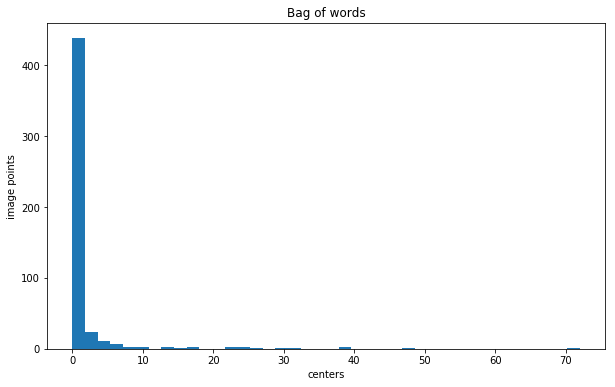

In [164]:
plt.figure(figsize=(10,6))
plt.hist(words_train[5], bins=40)
plt.xlabel('centers')
plt.ylabel('image points')
plt.title('Bag of words')
plt.show()